In [7]:
import pandas as pd 
import matplotlib.pyplot as plt   # plotting
import seaborn as sns   # plotting heatmap
import numpy as np # linear algebra
import cv2
import os

In [2]:
# path1  ='D:\Github\django-shop\handpose-mouse-simulation\data\click.csv'

# df = pd.read_csv(path1 , delimiter=',', header=0, skiprows=0,
#                             error_bad_lines=False)
# df1 = df.shift(1)
# df1.fillna(value=0)
# diff = df1[1:] - df[1:]
# diff.to_csv('./diff/' + "click" +'_diff' + '.csv',
#                     mode='a',
#                     header=False,
#                     index=False)

In [3]:
path2= 'D:\Github\django-shop\handpose-mouse-simulation\diff\click_diff.csv'

df = pd.read_csv(path2 , delimiter=',', header=0, skiprows=0,
                            error_bad_lines=False)

In [4]:
df

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,-0.003942,0.033502,-6.001279e-05,0.006209,0.042069,-0.011879,0.002121,0.036689,-0.023106,0.007315,...,-0.026107,0.022543,0.050336,-0.030845,0.025212,0.044905,-0.036961,0.025341,0.038951,-0.047176
1,0.013687,0.016966,4.914784e-05,0.006952,0.011011,0.002974,0.004674,0.012119,0.011114,0.000006,...,0.018067,0.001988,0.003753,0.023328,-0.001337,-0.005268,0.026468,-0.005155,-0.008690,0.031520
2,0.008099,0.031210,-7.770032e-06,0.011274,0.040511,-0.010502,0.012003,0.042163,-0.017267,0.012936,...,-0.003541,0.005984,0.035576,-0.009414,0.005391,0.036745,-0.011987,0.004045,0.038066,-0.015096
3,0.011268,0.019733,2.007544e-05,0.001018,0.005238,0.022855,0.001882,0.009107,0.034134,0.000773,...,0.015069,-0.000604,-0.007020,0.029504,-0.001239,-0.012576,0.034238,-0.001546,-0.008597,0.035619
4,0.005751,0.026161,-4.226287e-06,0.008179,0.033710,-0.016000,0.010606,0.031421,-0.020294,0.011218,...,-0.004363,0.018650,0.036460,-0.011992,0.020231,0.039914,-0.014763,0.019932,0.039273,-0.012405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,-0.002411,0.002630,-1.082745e-05,-0.002018,0.000018,-0.001350,-0.001700,-0.002052,-0.002924,-0.001236,...,-0.003550,-0.000267,0.002436,-0.001487,0.000329,0.002755,0.000884,0.001283,0.003616,0.002325
963,0.000158,-0.001190,4.034860e-06,-0.000122,0.001843,0.000688,-0.000874,0.003679,0.001989,-0.001827,...,0.001818,-0.001498,-0.002346,-0.001610,-0.002996,-0.003404,-0.004975,-0.005064,-0.003451,-0.007010
964,-0.000837,0.001680,-2.153083e-06,-0.001004,0.000170,0.001602,0.000149,-0.001534,0.001871,0.000875,...,-0.001457,-0.000297,0.000566,0.001871,-0.000411,0.000296,0.002951,-0.000173,0.000508,0.002782
965,-0.002434,0.000856,1.167697e-05,-0.002819,0.001335,-0.003678,-0.002849,0.003723,-0.004181,-0.002545,...,-0.000591,0.000689,0.001481,-0.003399,-0.000911,-0.000284,-0.005145,-0.003584,-0.001458,-0.005181


C:\Users\Qiao\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Qiao\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


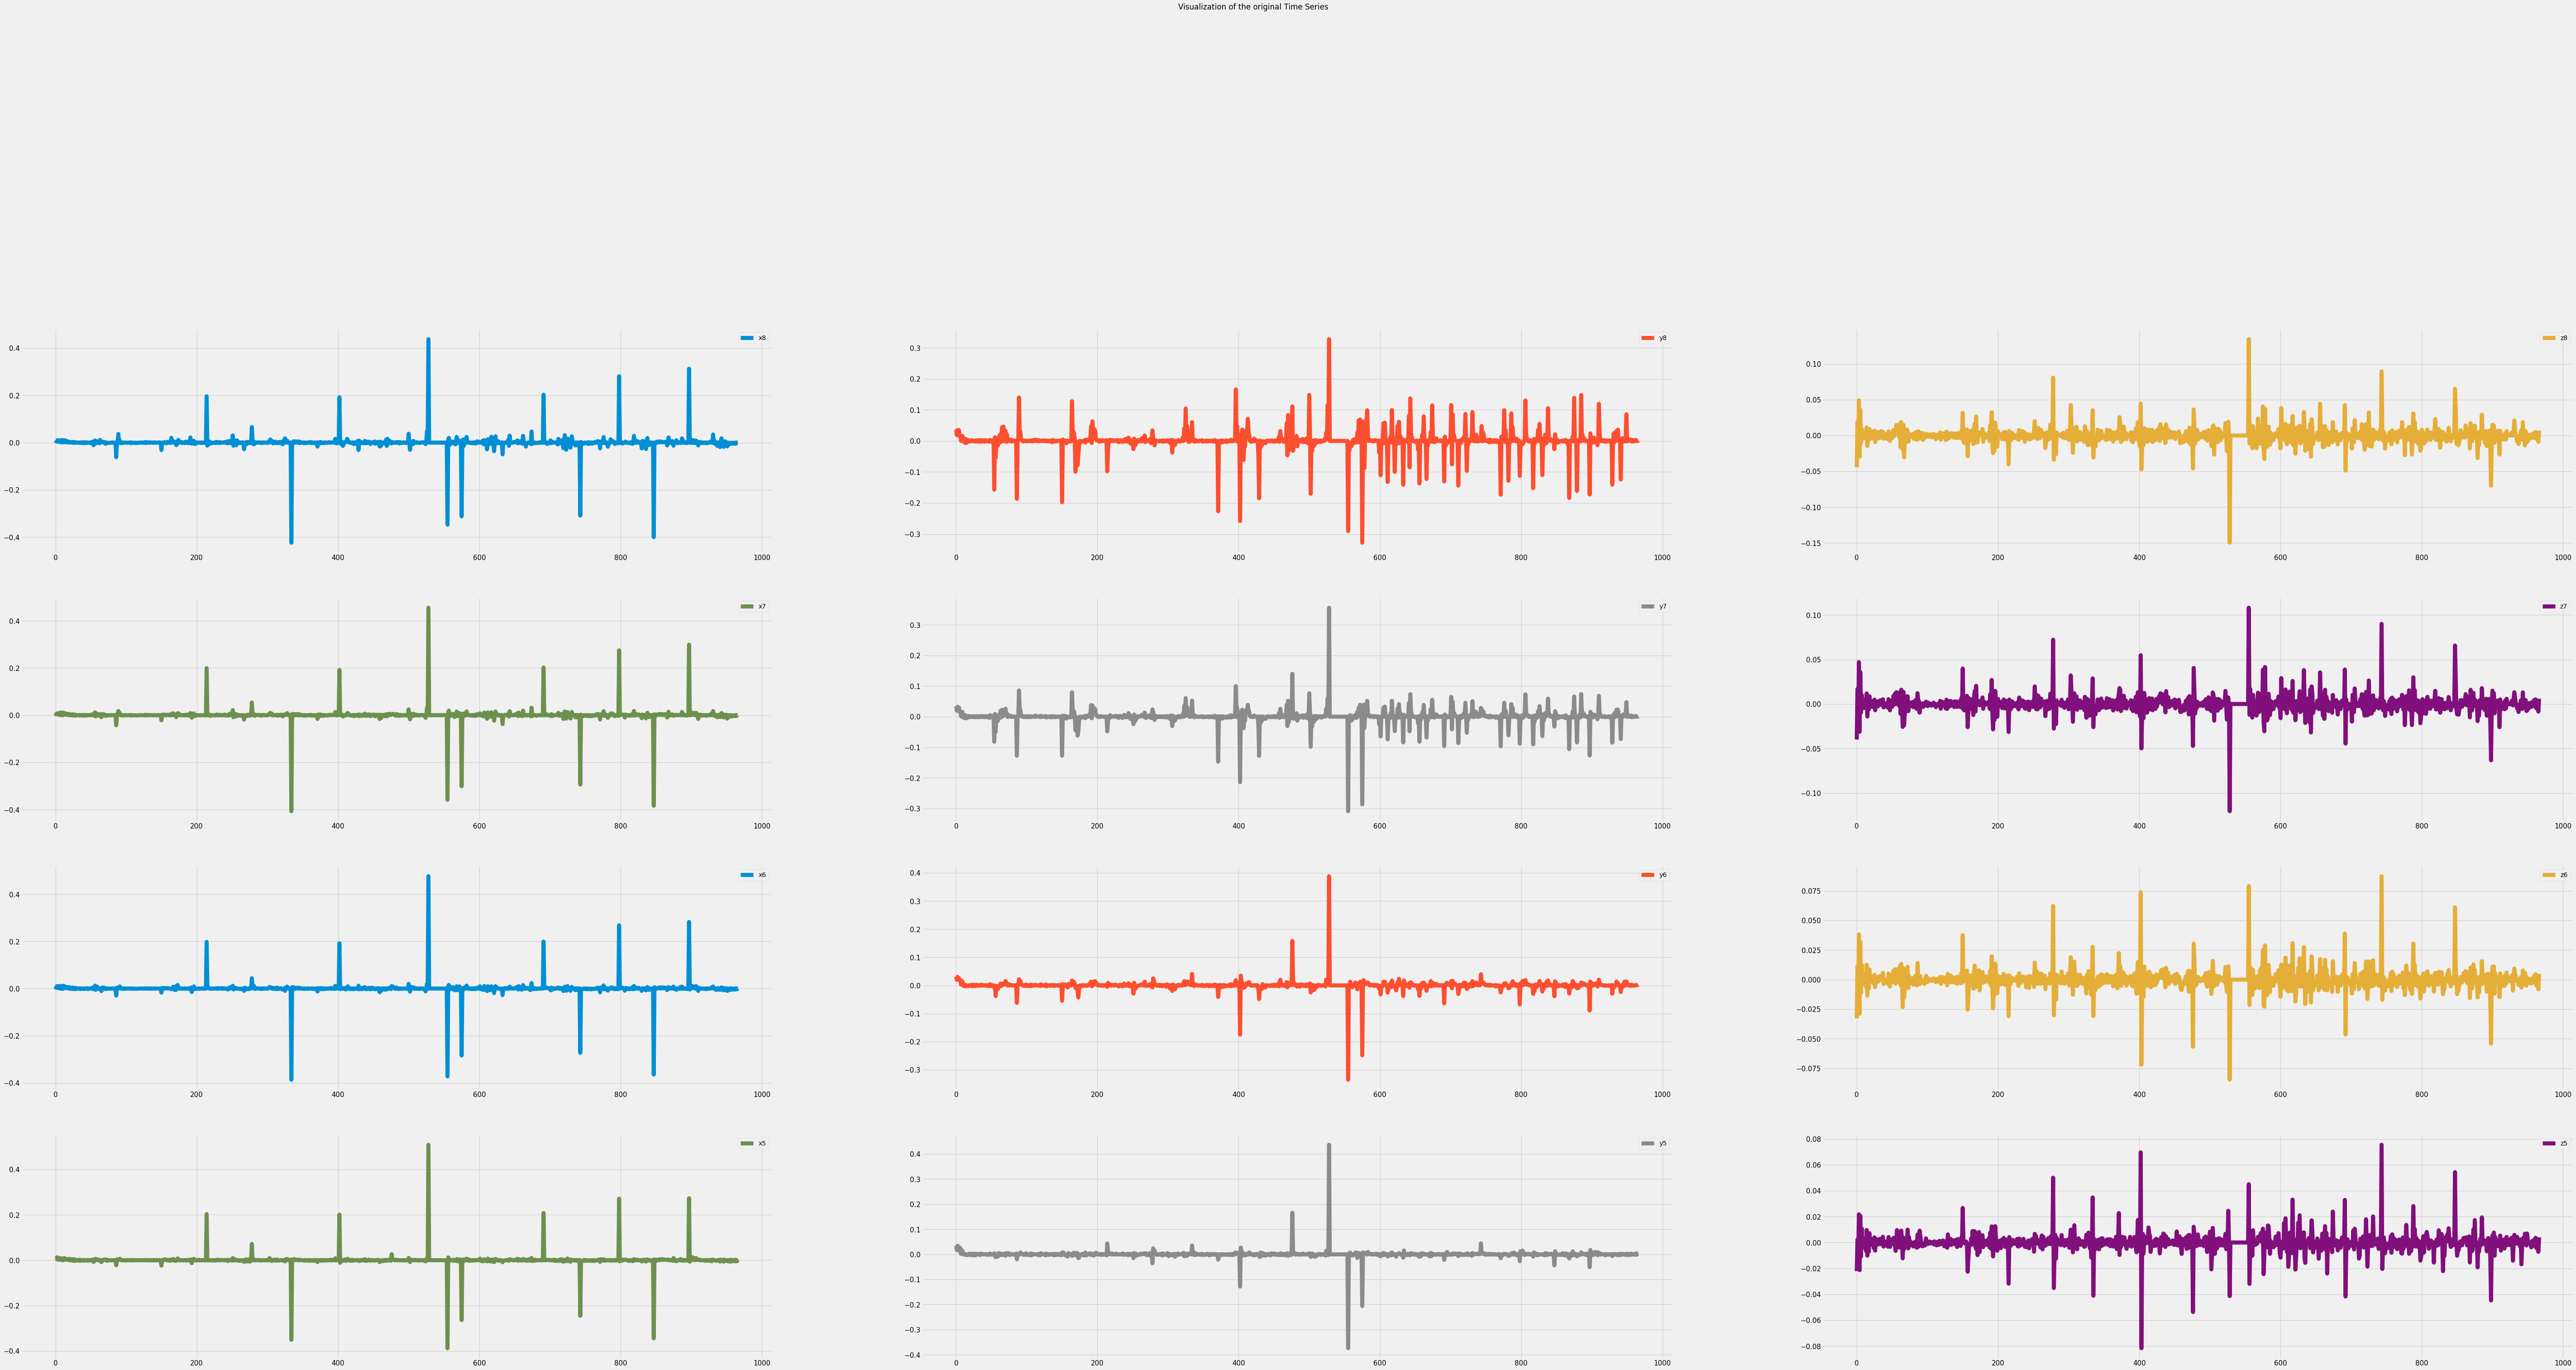

In [5]:
plt.style.use('fivethirtyeight')
df[['x8','y8','z8','x7','y7','z7','x6','y6','z6','x5','y5','z5']].plot(subplots=True,
        layout=(10,3),
        figsize=(90,100),
        fontsize=15, 
        linewidth=9,
        sharex=False,
        title='Visualization of the original Time Series')
plt.savefig('anapic1.png')

In [27]:
# df_transform = df.copy().pct_change(1)
# df_transform.head()
# df_transform.shape

(967, 63)

In [30]:
# train_features = df_transform.loc[1:400]
# train_labels = df.loc[1:400,"x9"]

# test_features = df_transform.loc[1:450]
# test_labels = df2.loc[1:400,"x9"]
# T = 30  # my choice of the timesteps window

# prepend_features = train_features.iloc[-(T-1):]
# test_features = pd.concat([prepend_features, test_features], axis=0)

# train_features.shape, train_labels.shape, test_features.shape, test_labels.shape
# #train_features.astype('float64')

((400, 63), (401, 63), (429, 63), (400, 63))

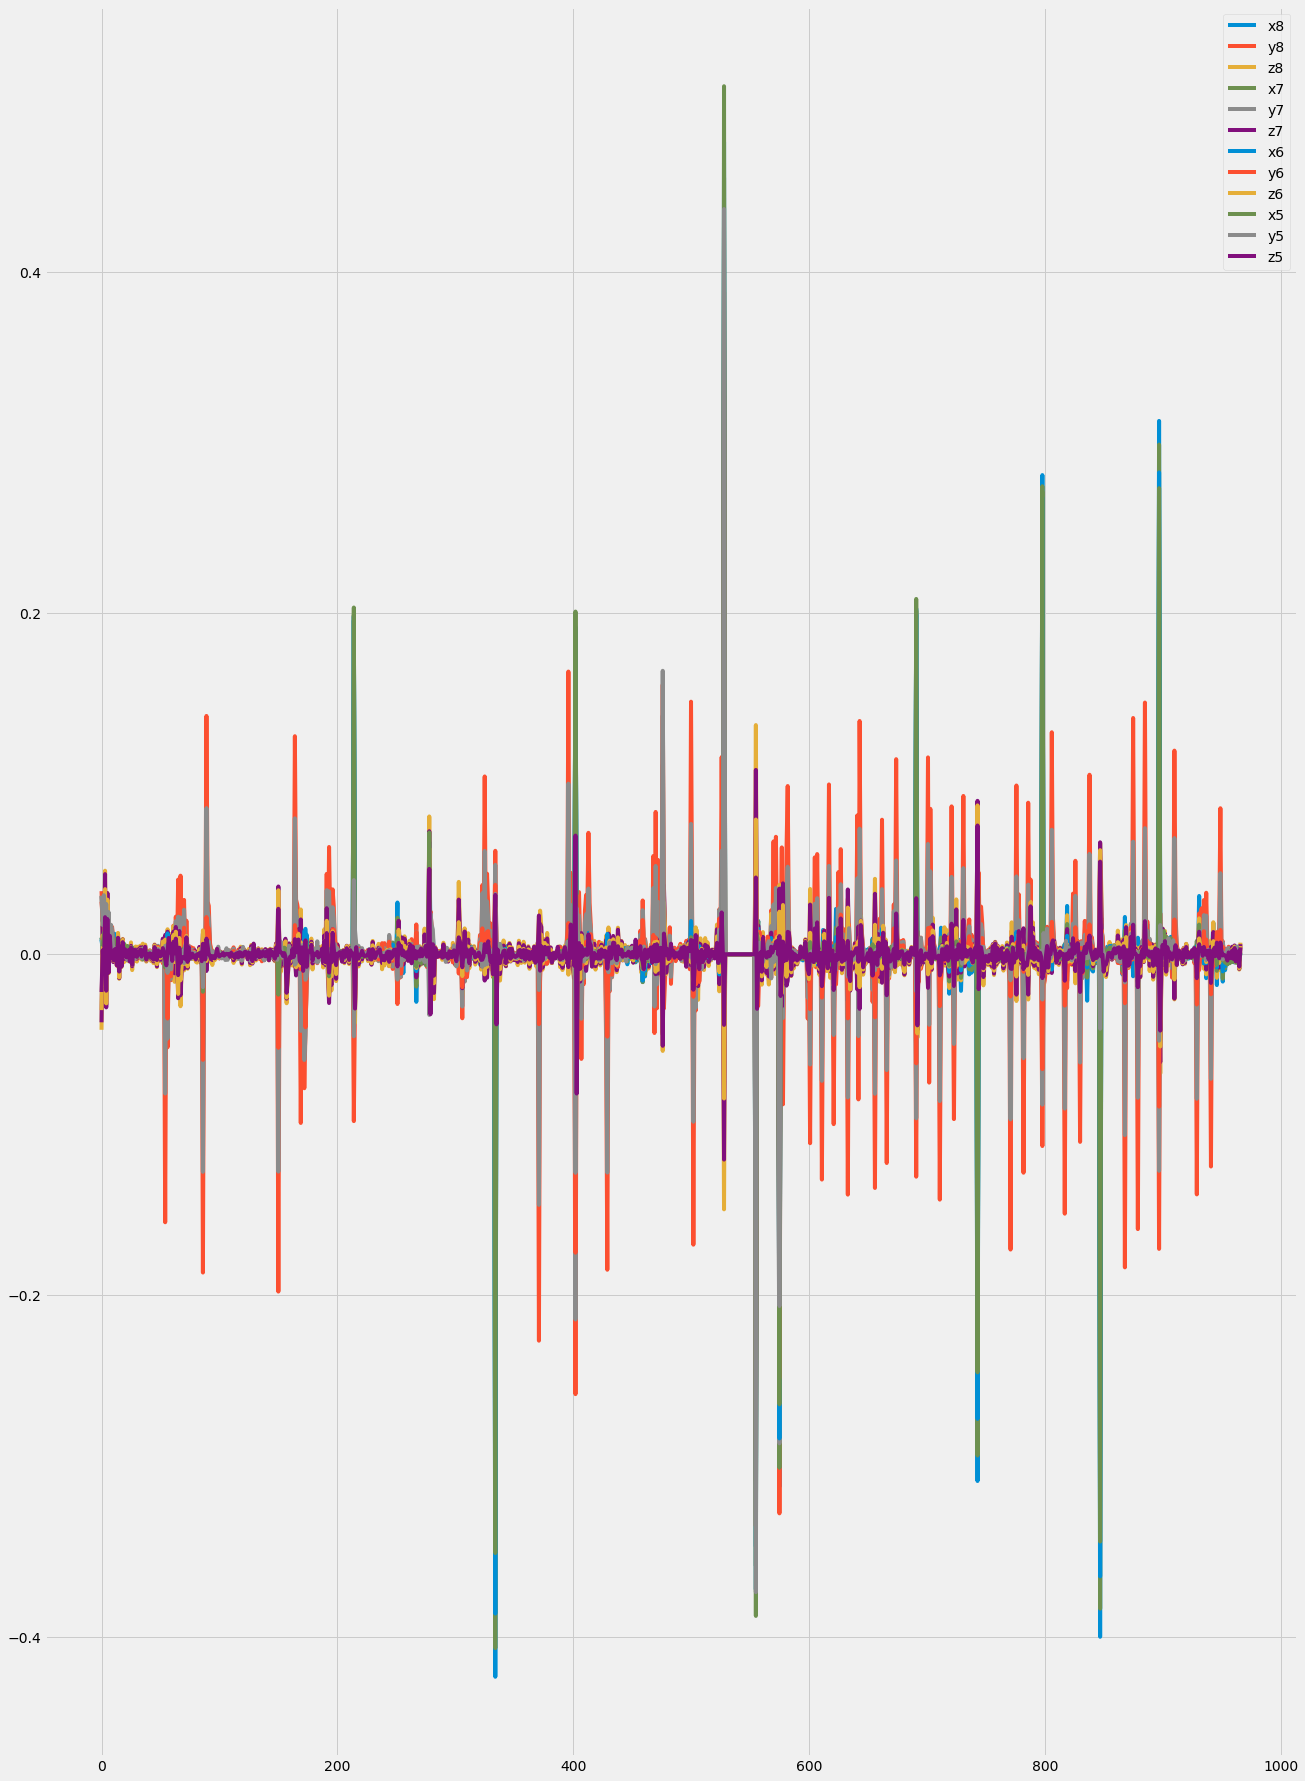

In [36]:
df[['x8','y8','z8','x7','y7','z7','x6','y6','z6','x5','y5','z5']].plot(  figsize=(20,30),)
plt.show()

C:\Users\Qiao\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


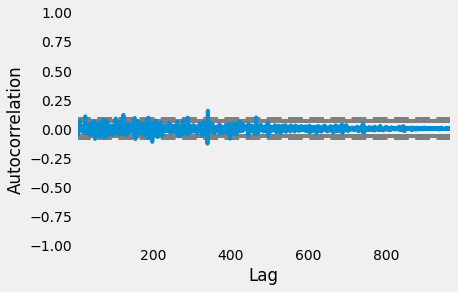

In [43]:

pd.plotting.autocorrelation_plot(df[['z5']])
plt.subplot()
plt.savefig('autocorrelation_plot.png')

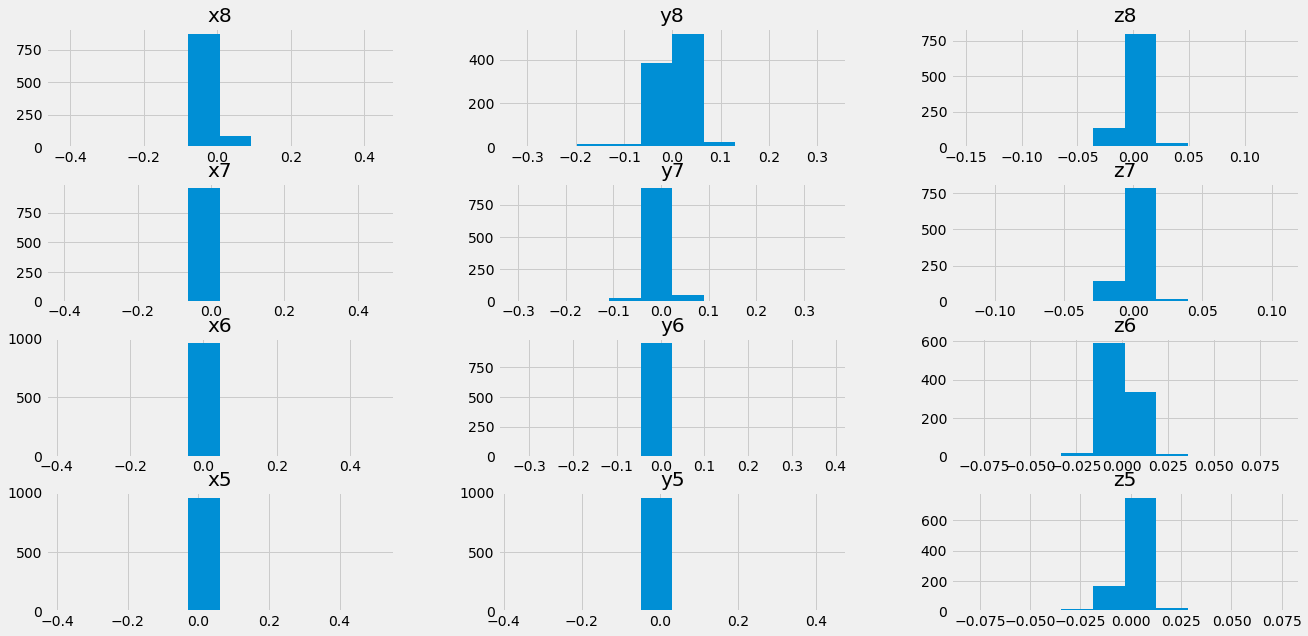

In [35]:
df[['x8','y8','z8','x7','y7','z7','x6','y6','z6','x5','y5','z5']].hist(figsize=(20,10),)

plt.show()

AttributeError: 'list' object has no attribute 'shape'